## Tweet Emotion Recognition: Natural Language Processing with TensorFlow

---

Dataset: [Tweet Emotion Dataset](https://github.com/dair-ai/emotion_dataset)

This is a starter notebook for the guided project [Tweet Emotion Recognition with TensorFlow](https://www.coursera.org/projects/tweet-emotion-tensorflow)

A complete version of this notebook is available in the course resources

---

## Task 1: Introduction

## Task 2: Setup and Imports

1. Installing Hugging Face's nlp package
2. Importing libraries

In [ ]:
!pip install nlp

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 33.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 110.5/110.5 kB 14.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 212.5/212.5 kB 12.6 MB/s eta 0:00:00


In [ ]:
%matplotlib inline

import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import nlp
import random


def show_history(h):
    epochs_trained = len(h.history['loss'])
    plt.figure(figsize=(16, 6))

    plt.subplot(1, 2, 1)
    plt.plot(range(0, epochs_trained), h.history.get('accuracy'), label='Training')
    plt.plot(range(0, epochs_trained), h.history.get('val_accuracy'), label='Validation')
    plt.ylim([0., 1.])
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()

    plt.subplot(1, 2, 2)
    plt.plot(range(0, epochs_trained), h.history.get('loss'), label='Training')
    plt.plot(range(0, epochs_trained), h.history.get('val_loss'), label='Validation')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.show()


def show_confusion_matrix(y_true, y_pred, classes):
    from sklearn.metrics import confusion_matrix

    cm = confusion_matrix(y_true, y_pred, normalize='true')

    plt.figure(figsize=(8, 8))
    sp = plt.subplot(1, 1, 1)
    ctx = sp.matshow(cm)
    plt.xticks(list(range(0, 6)), labels=classes)
    plt.yticks(list(range(0, 6)), labels=classes)
    plt.colorbar(ctx)
    plt.show()


print('Using TensorFlow version', tf.__version__)

Using TensorFlow version 2.12.0


## Task 3: Importing Data

1. Importing the Tweet Emotion dataset
2. Creating train, validation and test sets
3. Extracting tweets and labels from the examples

In [ ]:
!pip install datasets
from datasets import load_dataset
dataset = load_dataset('emotion')

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 486.2/486.2 kB 26.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.3/134.3 kB 9.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 268.8/268.8 kB 29.4 MB/s eta 0:00:00


Extracting data files:   0%|          | 0/3 [00:00<?, ?it/s]

Generating train split:   0%|          | 0/16000 [00:00<?, ? examples/s]

Generating validation split:   0%|          | 0/2000 [00:00<?, ? examples/s]

Generating test split:   0%|          | 0/2000 [00:00<?, ? examples/s]

Dataset emotion downloaded and prepared to /root/.cache/huggingface/datasets/emotion/split/1.0.0/cca5efe2dfeb58c1d098e0f9eeb200e9927d889b5a03c67097275dfb5fe463bd. Subsequent calls will reuse this data.


  0%|          | 0/3 [00:00<?, ?it/s]

In [ ]:
dataset

DatasetDict({
    train: Dataset({
        features: ['text', 'label'],
        num_rows: 16000
    })
    validation: Dataset({
        features: ['text', 'label'],
        num_rows: 2000
    })
    test: Dataset({
        features: ['text', 'label'],
        num_rows: 2000
    })
})

In [ ]:
train = dataset['train']
val = dataset['validation']
test = dataset['test']

In [ ]:
emo_dict = {0: 'sadness', 1: 'joy', 2:'love', 3: 'anger', 4:'fear', 5:'surprise'}
emo_dict[0]

'sadness'

In [ ]:
def get_tweet(data):
  tweets = [x['text'] for x in data]
  labels = [emo_dict[x['label']] for x in data]
  return tweets, labels

In [ ]:
tweets , labels = get_tweet(train)

In [ ]:
tweets[1], labels[1]

# label: a classification label, with possible values including sadness (0), joy (1), love (2), anger (3), fear (4), surprise (5).

('i can go from feeling so hopeless to so damned hopeful just from being around someone who cares and is awake',
 'sadness')

## Task 4: Tokenizer

1. Tokenizing the tweets

In [ ]:
from tensorflow.keras.preprocessing.text import Tokenizer

In [ ]:
tokenizer = Tokenizer(num_words=10000, oov_token='<UNK>')
tokenizer.fit_on_texts(tweets)

In [ ]:
tweets[0]

'i didnt feel humiliated'

In [ ]:
tokenizer.texts_to_sequences([tweets[0]])

[[2, 139, 3, 679]]

## Task 5: Padding and Truncating Sequences

1. Checking length of the tweets
2. Creating padded sequences

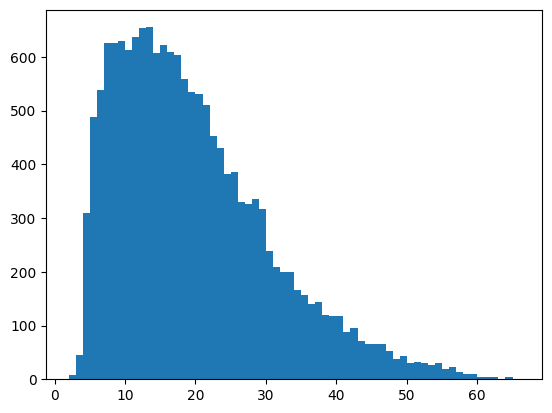

In [ ]:
lengths = [len(t.split(' ')) for t in tweets]
plt.hist(lengths, bins= len(set(lengths)))
plt.show()

In [ ]:
maxlen = 50

from tensorflow.keras.preprocessing.sequence import pad_sequences

In [ ]:
def get_sequences(tokenizer, tweets):
  sequences =  tokenizer.texts_to_sequences(tweets)
  padded = pad_sequences(sequences, truncating = 'post', padding = 'post', maxlen = maxlen)
  return padded

In [ ]:
padded_train_seq = get_sequences(tokenizer, tweets)

In [ ]:
padded_train_seq[0]

array([  2, 139,   3, 679,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0], dtype=int32)

# Task 6: Preparing the Labels

1.   Creating classes to index and index to classes dictionaries
2.   Converting text labels to numeric labels



In [ ]:
classes = set(labels)
print(classes)

{'joy', 'fear', 'sadness', 'surprise', 'anger', 'love'}


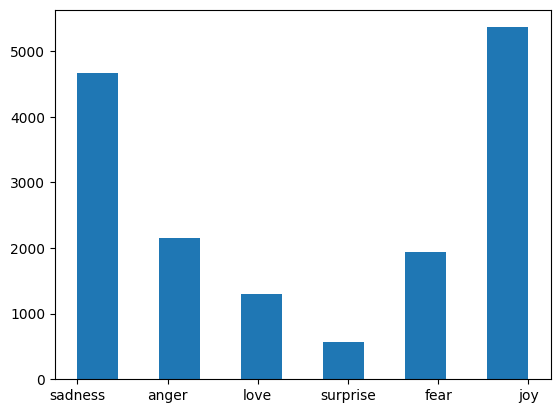

In [ ]:
plt.hist(labels, bins = 11)
plt.show()

In [ ]:
class_to_index = dict((c, i) for i, c in enumerate(classes))
index_to_class = dict((v, k) for k, v in class_to_index.items())

In [ ]:
class_to_index

{'joy': 0, 'fear': 1, 'sadness': 2, 'surprise': 3, 'anger': 4, 'love': 5}

In [ ]:
index_to_class

{0: 'joy', 1: 'fear', 2: 'sadness', 3: 'surprise', 4: 'anger', 5: 'love'}

In [ ]:
names_to_ids = lambda labels: np.array([class_to_index.get(x) for x in labels])

In [ ]:
train_labels = names_to_ids(labels)
print(train_labels[0])

2


## Task 7: Creating the Model

1. Creating the model
2. Compiling the model

In [ ]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Embedding(10000, 16, input_length = maxlen),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(20, return_sequences = True)),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(20)),
    tf.keras.layers.Dense(6, activation = 'softmax')
])

model.compile(
    loss = 'sparse_categorical_crossentropy',
    optimizer = 'adam',
    metrics = ['accuracy']
)

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_2 (Embedding)     (None, 50, 16)            160000    
                                                                 
 bidirectional_2 (Bidirectio  (None, 50, 40)           5920      
 nal)                                                            
                                                                 
 bidirectional_3 (Bidirectio  (None, 40)               9760      
 nal)                                                            
                                                                 
 dense (Dense)               (None, 6)                 246       
                                                                 
Total params: 175,926
Trainable params: 175,926
Non-trainable params: 0
_________________________________________________________________


## Task 8: Training the Model

1. Preparing a validation set
2. Training the model

In [ ]:
val_tweets, val_labels = get_tweet(val)
val_seq = get_sequences(tokenizer, val_tweets)
val_labels = names_to_ids(val_labels)

In [ ]:
val_tweets[0], val_labels[0]

('im feeling quite sad and sorry for myself but ill snap out of it soon', 2)

In [ ]:
h = model.fit(
    padded_train_seq, train_labels,
    validation_data=(val_seq, val_labels),
    epochs = 20,
    callbacks =[
      tf.keras.callbacks.EarlyStopping(monitor='val_accuracy', patience = 2)
    ]
)

Epoch 1/20
500/500 [==============================] - 46s 67ms/step - loss: 1.3676 - accuracy: 0.4611 - val_loss: 0.8796 - val_accuracy: 0.7140
Epoch 2/20
500/500 [==============================] - 11s 22ms/step - loss: 0.6797 - accuracy: 0.7753 - val_loss: 0.6073 - val_accuracy: 0.7865
Epoch 3/20
500/500 [==============================] - 9s 18ms/step - loss: 0.4086 - accuracy: 0.8627 - val_loss: 0.4639 - val_accuracy: 0.8575
Epoch 4/20
500/500 [==============================] - 7s 14ms/step - loss: 0.2638 - accuracy: 0.9183 - val_loss: 0.4134 - val_accuracy: 0.8785
Epoch 5/20
500/500 [==============================] - 8s 17ms/step - loss: 0.2050 - accuracy: 0.9392 - val_loss: 0.4331 - val_accuracy: 0.8750
Epoch 6/20
500/500 [==============================] - 10s 20ms/step - loss: 0.1552 - accuracy: 0.9544 - val_loss: 0.4173 - val_accuracy: 0.8850
Epoch 7/20
500/500 [==============================] - 8s 15ms/step - loss: 0.1242 - accuracy: 0.9634 - val_loss: 0.4021 - val_accuracy: 0.8

## Task 9: Evaluating the Model

1. Visualizing training history
2. Prepraring a test set
3. A look at individual predictions on the test set
4. A look at all predictions on the test set

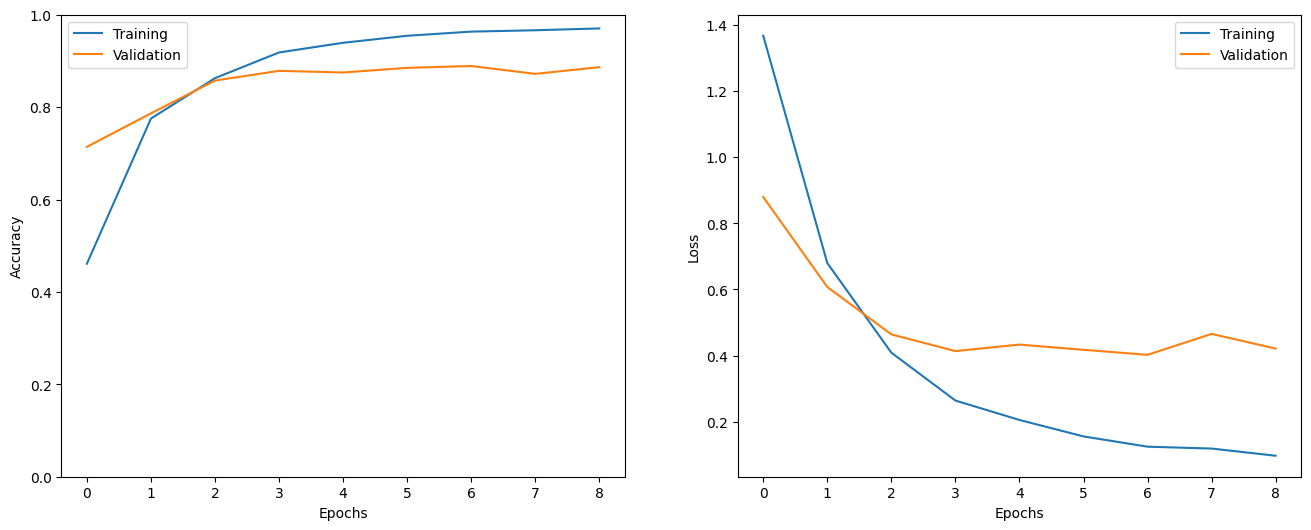

In [ ]:
show_history(h)

In [ ]:
test_tweets, test_labels = get_tweet(test)
test_seq = get_sequences(tokenizer, test_tweets)
test_labels_ids = names_to_ids(test_labels)

In [ ]:
test_labels

['sadness',
 'sadness',
 'sadness',
 'joy',
 'sadness',
 'fear',
 'anger',
 'joy',
 'joy',
 'anger',
 'fear',
 'sadness',
 'fear',
 'joy',
 'love',
 'sadness',
 'joy',
 'sadness',
 'anger',
 'joy',
 'sadness',
 'joy',
 'joy',
 'sadness',
 'sadness',
 'fear',
 'anger',
 'sadness',
 'fear',
 'anger',
 'fear',
 'anger',
 'sadness',
 'anger',
 'sadness',
 'joy',
 'joy',
 'sadness',
 'joy',
 'joy',
 'anger',
 'sadness',
 'joy',
 'sadness',
 'joy',
 'anger',
 'joy',
 'joy',
 'fear',
 'fear',
 'sadness',
 'fear',
 'joy',
 'sadness',
 'joy',
 'sadness',
 'sadness',
 'joy',
 'sadness',
 'anger',
 'sadness',
 'sadness',
 'joy',
 'joy',
 'sadness',
 'surprise',
 'sadness',
 'anger',
 'fear',
 'surprise',
 'joy',
 'love',
 'surprise',
 'joy',
 'love',
 'anger',
 'joy',
 'sadness',
 'joy',
 'love',
 'joy',
 'anger',
 'sadness',
 'joy',
 'sadness',
 'sadness',
 'joy',
 'joy',
 'joy',
 'sadness',
 'joy',
 'fear',
 'anger',
 'fear',
 'anger',
 'anger',
 'love',
 'sadness',
 'anger',
 'sadness',
 'sadn

In [ ]:
test_labels_ids

array([2, 2, 2, ..., 0, 0, 1])

In [ ]:
_= model.evaluate(test_seq, test_labels_ids)

63/63 [==============================] - 0s 7ms/step - loss: 0.3830 - accuracy: 0.8925


In [ ]:
from pandas.core.dtypes.astype import astype_array
i = random.randint(0, len(test_labels)-1)

print('Sentence: ', test_tweets[i])
print('Emotion: ', index_to_class[test_labels_ids[i]])

p = model.predict(np.expand_dims(test_seq[i], axis=0))[0]

pred_class = index_to_class[np.argmax(p).astype('uint8')]

print('Predicted Emotion: ', pred_class)

Sentence:  i feel lost without you
Emotion:  sadness
1/1 [==============================] - 0s 29ms/step
Predicted Emotion:  sadness


In [ ]:
preds = model.predict(test_seq)
preds

63/63 [==============================] - 0s 5ms/step


array([[4.1769893e-04, 8.4668813e-05, 9.9923372e-01, 5.0092117e-06,
        2.4115003e-04, 1.7784789e-05],
       [4.9601478e-04, 1.6230271e-04, 9.9897063e-01, 9.3587241e-06,
        3.3399870e-04, 2.7626489e-05],
       [1.7960579e-03, 9.9819724e-04, 9.9196213e-01, 5.3871430e-05,
        4.8126304e-03, 3.7707621e-04],
       ...,
       [9.9890935e-01, 1.9591434e-05, 2.3253637e-04, 5.4961049e-05,
        7.6451550e-05, 7.0707541e-04],
       [9.9941099e-01, 9.1211687e-06, 1.8673358e-04, 3.0782743e-05,
        5.6317960e-05, 3.0600934e-04],
       [7.3438091e-04, 9.1872108e-01, 4.9416227e-03, 6.8940654e-02,
        1.9992683e-03, 4.6630637e-03]], dtype=float32)

In [ ]:
# preds_class = []
# for each in preds :
#   preds_class += index_to_class[np.argmax(each) ]

preds_class = np.argmax(preds,axis=1)
preds_class = [index_to_class[x] for x in preds_class]
preds_class

['sadness',
 'sadness',
 'sadness',
 'joy',
 'sadness',
 'fear',
 'fear',
 'joy',
 'joy',
 'anger',
 'anger',
 'sadness',
 'sadness',
 'joy',
 'love',
 'sadness',
 'joy',
 'joy',
 'anger',
 'joy',
 'sadness',
 'joy',
 'joy',
 'sadness',
 'sadness',
 'fear',
 'anger',
 'sadness',
 'fear',
 'anger',
 'fear',
 'anger',
 'sadness',
 'anger',
 'sadness',
 'joy',
 'joy',
 'sadness',
 'joy',
 'joy',
 'anger',
 'sadness',
 'joy',
 'sadness',
 'joy',
 'anger',
 'joy',
 'joy',
 'fear',
 'joy',
 'sadness',
 'fear',
 'joy',
 'sadness',
 'joy',
 'sadness',
 'sadness',
 'joy',
 'sadness',
 'anger',
 'sadness',
 'sadness',
 'surprise',
 'joy',
 'sadness',
 'surprise',
 'sadness',
 'sadness',
 'fear',
 'surprise',
 'joy',
 'love',
 'fear',
 'joy',
 'joy',
 'anger',
 'joy',
 'sadness',
 'joy',
 'love',
 'joy',
 'anger',
 'sadness',
 'joy',
 'sadness',
 'sadness',
 'joy',
 'joy',
 'joy',
 'sadness',
 'joy',
 'fear',
 'anger',
 'fear',
 'fear',
 'anger',
 'joy',
 'sadness',
 'anger',
 'sadness',
 'sadnes

ValueError: ignored

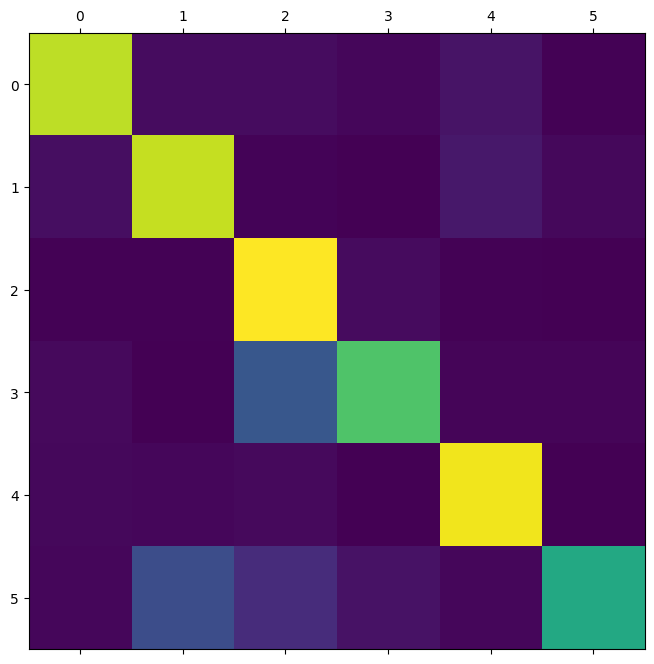

In [ ]:
show_confusion_matrix(test_labels, preds_class, list(preds_class))